In [514]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
from scipy.io import wavfile

In [586]:
t0 = 0
t1 = 0.005 #duty stop time in seconds (also chirp stop time)

DutyCycle = 10 #in Percent
Repeats = 1200

f0 = 5000 #freq sweep start
f1 = 20000 #freq sweep stop

samplingRate = 48000 #Sample Rate of Recieving equipment

In [587]:
time_duty = np.arange(t0,t1,1/samplingRate)
time_full = np.arange(t0,100/DutyCycle*t1,1/samplingRate)
print(len(time_full),len(time_duty))

2400 240


In [588]:
chirp = scipy.signal.chirp(time_duty,f0,t1,f1,phi = 90)
chirp_zero = np.append(chirp,np.zeros(int(9*len(time_duty)/10)))
chirp_zero = np.append(np.zeros(int(len(time_duty)/10)),chirp_zero)
print(len(chirp_zero),len(chirp))
if DutyCycle<50:
    chirp_zero = np.append(chirp_zero,np.zeros(int(100/DutyCycle*len(time_duty)-2*len(time_duty))))
print(len(chirp_zero),len(time_full))        

480 240
2400 2400


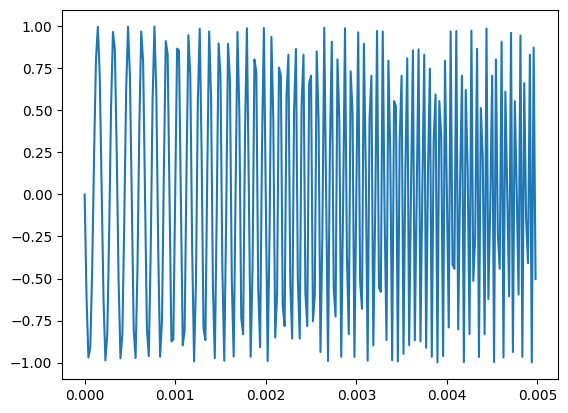

In [589]:
plt.figure()
plt.plot(time_duty,chirp)

Text(0, 0.5, 'Amplitude')

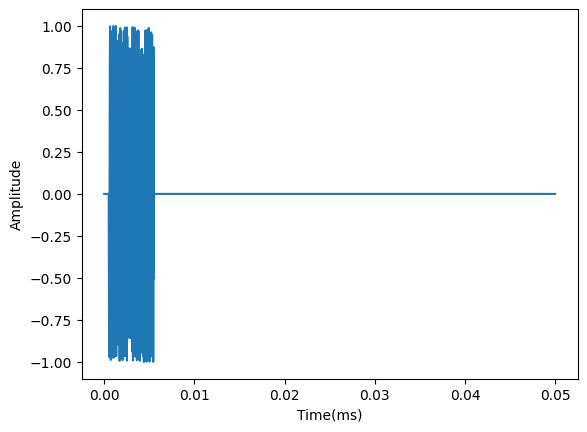

In [590]:
plt.figure()
plt.plot(time_full,chirp_zero)
plt.xlabel('Time(ms)')
plt.ylabel('Amplitude')
#plt.savefig('RealisticChirp_10Khz_20kHz_100msDuty')

In [591]:
Modulation = np.zeros(len(time_duty))
#Positions of alternating multiple:

#3 "bits" of 1:
S1 = int(3*len(time_duty)/8)
#2 "bits" of -1
S2 = S1+int(2*len(time_duty)/8)
#1 "bit" of 1:
S3 = S2 + int(len(time_duty)/8)
#1 "bit" of 1:
S4 = S3 + int(len(time_duty)/8)

print(time_duty[S1],time_duty[S2],time_duty[S3],time_duty[S4])

0.001875 0.0031249999999999997 0.00375 0.0043749999999999995


In [592]:
for i in np.arange(len(Modulation)):
    if i<S1:
        Modulation[i] = 1
    if S1<i<S2:
        Modulation[i] = -1
    if S2<i<S3:
        Modulation[i] = 1
    if S3<i<S4:
        Modulation[i] = -1
    if S4<i:
        Modulation[i] = 1

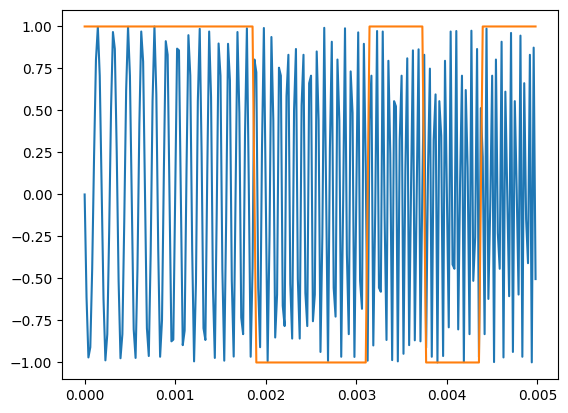

In [593]:
plt.figure()
plt.plot(time_duty,chirp)
plt.plot(time_duty,Modulation)

In [594]:
ModChirp = Modulation*chirp

In [595]:
Modchirp_zero = np.append(ModChirp,np.zeros(int(9*len(time_duty)/10)))
Modchirp_zero = np.append(np.zeros(int(len(time_duty)/10)),Modchirp_zero)
if DutyCycle<50:
    Modchirp_zero = np.append(Modchirp_zero,np.zeros(int(100/DutyCycle*len(time_duty)-2*len(time_duty))))    

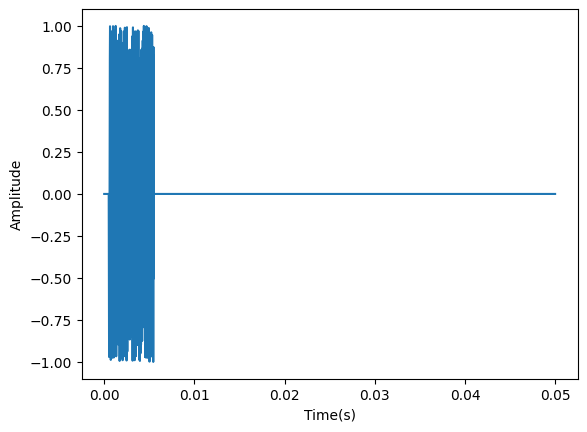

In [599]:
plt.figure()
plt.plot(time_full,Modchirp_zero)
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.savefig('ModulatedChirp_{}SDutyTime_{}kHzTo{}kHz_{}%DutyCycle.png'.format(t1,f0/1000,f1/1000,DutyCycle))

In [597]:
scaled_ModChirp = np.int16(Modchirp_zero/np.max(np.abs(Modchirp_zero)) * 32767)
wavfile.write('ModulatedChirp_{}SDutyTime_{}kHzTo{}kHz_{}%DutyCycle.wav'.format(t1,f0/1000,f1/1000,DutyCycle), samplingRate, scaled_ModChirp)

In [598]:
ModChirp_zero_Repeated = Modchirp_zero
print(time_full[-1]*Repeats)
for i in np.arange(Repeats-1):
    ModChirp_zero_Repeated = np.append(ModChirp_zero_Repeated,Modchirp_zero)

59.974999999999994


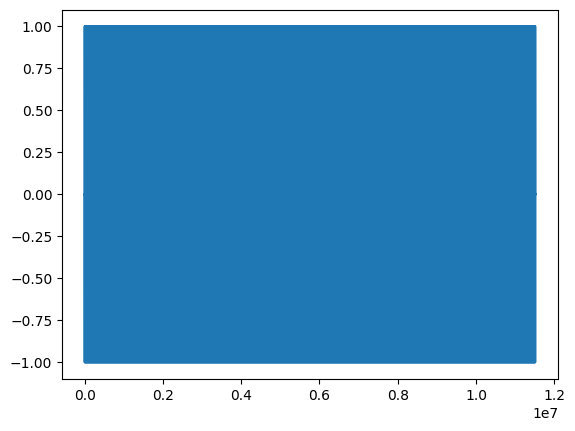

In [583]:
plt.figure()
plt.plot(ModChirp_zero_Repeated)

In [584]:
scaled_ModChirp_repeats = np.int16(ModChirp_zero_Repeated/np.max(np.abs(ModChirp_zero_Repeated)) * 32767)
wavfile.write('ModulatedChirp_{}SDutyTime_{}kHzTo{}kHz_{}%DutyCycle_{}Cycles.wav'.format(t1,f0/1000,f1/1000,DutyCycle,Repeats), samplingRate, scaled_ModChirp_repeats)